# AIR QUALITY ANALYSIS

In [ ]:
# Import necessary libraries
import pandas as pd

# Defined the File Path
file_path = "AirQuality_Dataset.xlsx"

# Load the dataset
df = pd.read_excel(file_path)

# Display first 5 rows
df.head()


,Date,Source,Site ID,POC,Daily Max 8-hour Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,2024-01-01,AQS,480291069,1,0.6,ppm,7,San Antonio Interstate 35,19,79,...,Carbon monoxide,93.0,41700.0,"San Antonio-New Braunfels, TX",48,Texas,29,Bexar,29.529432,-98.391403
1,2024-01-02,AQS,480291069,1,0.3,ppm,3,San Antonio Interstate 35,24,100,...,Carbon monoxide,93.0,41700.0,"San Antonio-New Braunfels, TX",48,Texas,29,Bexar,29.529432,-98.391403
2,2024-01-03,AQS,480291069,1,0.4,ppm,5,San Antonio Interstate 35,24,100,...,Carbon monoxide,93.0,41700.0,"San Antonio-New Braunfels, TX",48,Texas,29,Bexar,29.529432,-98.391403
3,2024-01-04,AQS,480291069,1,0.3,ppm,3,San Antonio Interstate 35,24,100,...,Carbon monoxide,93.0,41700.0,"San Antonio-New Braunfels, TX",48,Texas,29,Bexar,29.529432,-98.391403
4,2024-01-05,AQS,480291069,1,0.6,ppm,7,San Antonio Interstate 35,24,100,...,Carbon monoxide,93.0,41700.0,"San Antonio-New Braunfels, TX",48,Texas,29,Bexar,29.529432,-98.391403


In [ ]:
# Check data types of each column
df.info()

# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

# Check for duplicate records
duplicate_records = df.duplicated().sum()
print(f"Number of duplicate records: {duplicate_records}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141311 entries, 0 to 141310
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Date                            141311 non-null  datetime64[ns]
 1   Source                          141311 non-null  object        
 2   Site ID                         141311 non-null  int64         
 3   POC                             141311 non-null  int64         
 4   Daily Max 8-hour Concentration  141311 non-null  float64       
 5   Units                           141311 non-null  object        
 6   Daily AQI Value                 141311 non-null  object        
 7   Local Site Name                 141310 non-null  object        
 8   Daily Obs Count                 141311 non-null  int64         
 9   Percent Complete                141311 non-null  int64         
 10  AQS Parameter Code              141311 non-null  int64  

In [ ]:
# Remove duplicate records
df_cleaned = df.drop_duplicates()

# Check missing values after removing duplicates
missing_values = df_cleaned.isnull().sum()

# Display cleaned dataset info
df_cleaned.info(), missing_values


<class 'pandas.core.frame.DataFrame'>
Index: 116405 entries, 0 to 141310
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Date                            116405 non-null  datetime64[ns]
 1   Source                          116405 non-null  object        
 2   Site ID                         116405 non-null  int64         
 3   POC                             116405 non-null  int64         
 4   Daily Max 8-hour Concentration  116405 non-null  float64       
 5   Units                           116405 non-null  object        
 6   Daily AQI Value                 116405 non-null  object        
 7   Local Site Name                 116404 non-null  object        
 8   Daily Obs Count                 116405 non-null  int64         
 9   Percent Complete                116405 non-null  int64         
 10  AQS Parameter Code              116405 non-null  int64       

(None,
 Date                                 0
 Source                               0
 Site ID                              0
 POC                                  0
 Daily Max 8-hour Concentration       0
 Units                                0
 Daily AQI Value                      0
 Local Site Name                      1
 Daily Obs Count                      0
 Percent Complete                     0
 AQS Parameter Code                   0
 AQS Parameter Description            0
 Method Code                       5704
 CBSA Code                         2360
 CBSA Name                         2360
 State FIPS Code                      0
 State                                0
 County FIPS Code                     0
 County                               0
 Site Latitude                        0
 Site Longitude                       0
 dtype: int64)

In [ ]:
# Fill categorical missing values with 'Unknown'
df_cleaned.loc[:, 'Local Site Name'] = df_cleaned['Local Site Name'].fillna("Unknown")
df_cleaned.loc[:, 'CBSA Name'] = df_cleaned['CBSA Name'].fillna("Unknown")

# Fill numerical missing values with median
df_cleaned.loc[:, 'Method Code'] = df_cleaned['Method Code'].fillna(df_cleaned['Method Code'].median())
df_cleaned.loc[:, 'CBSA Code'] = df_cleaned['CBSA Code'].fillna(df_cleaned['CBSA Code'].median())

# Verify missing values are handled
df_cleaned.isnull().sum()


,0
Date,0
Source,0
Site ID,0
POC,0
Daily Max 8-hour Concentration,0
Units,0
Daily AQI Value,0
Local Site Name,0
Daily Obs Count,0
Percent Complete,0


In [ ]:
# Check for negative or unrealistic AQI values
invalid_aqi = df_cleaned[df_cleaned['Daily AQI Value'].astype(str).str.contains('-|[^0-9]')]

# Check for out-of-range latitude and longitude
invalid_lat_long = df_cleaned[
    (df_cleaned['Site Latitude'] < 25.837) | (df_cleaned['Site Latitude'] > 36.500) |
    (df_cleaned['Site Longitude'] < -106.645) | (df_cleaned['Site Longitude'] > -93.508)
]


# Display results
invalid_aqi, invalid_lat_long


(            Date Source    Site ID  POC  Daily Max 8-hour Concentration  \
 3096  2024-01-01    AQS  480850009    1                           0.016   
 3097  2024-01-01    AQS  480850029    1                           0.016   
 3098  2024-01-07    AQS  480850009    1                           0.001   
 3099  2024-01-07    AQS  480850009    2                           0.001   
 3100  2024-01-07    AQS  480850029    1                           0.005   
 ...          ...    ...        ...  ...                             ...   
 98278 2022-04-11    AQS  482570020    2                           0.004   
 98279 2022-04-23    AQS  482570020    2                           0.058   
 98280 2022-05-05    AQS  482570020    2                           0.015   
 98281 2022-05-17    AQS  482570020    2                           0.038   
 98282 2022-05-29    AQS  482570020    2                           0.006   
 
           Units Daily AQI Value    Local Site Name  Daily Obs Count  \
 3096   ug/m3 

In [ ]:
import numpy as np

# Convert invalid AQI values to NaN
df_cleaned.loc[:, 'Daily AQI Value'] = df_cleaned['Daily AQI Value'].replace(".", np.nan)

# Convert to numeric
df_cleaned.loc[:, 'Daily AQI Value'] = pd.to_numeric(df_cleaned['Daily AQI Value'], errors='coerce')

# Fill missing AQI values with median
df_cleaned.loc[:, 'Daily AQI Value'] = df_cleaned['Daily AQI Value'].fillna(df_cleaned['Daily AQI Value'].median())


<ipython-input-8-918c5eefc98a>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned.loc[:, 'Daily AQI Value'] = df_cleaned['Daily AQI Value'].replace(".", np.nan)
<ipython-input-8-918c5eefc98a>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned.loc[:, 'Daily AQI Value'] = df_cleaned['Daily AQI Value'].fillna(df_cleaned['Daily AQI Value'].median())


In [ ]:
# Check for any remaining missing values
missing_values = df_cleaned.isnull().sum()

# Display summary statistics for numerical columns
summary_stats = df_cleaned.describe()

missing_values, summary_stats


(Date                              0
 Source                            0
 Site ID                           0
 POC                               0
 Daily Max 8-hour Concentration    0
 Units                             0
 Daily AQI Value                   0
 Local Site Name                   0
 Daily Obs Count                   0
 Percent Complete                  0
 AQS Parameter Code                0
 AQS Parameter Description         0
 Method Code                       0
 CBSA Code                         0
 CBSA Name                         0
 State FIPS Code                   0
 State                             0
 County FIPS Code                  0
 County                            0
 Site Latitude                     0
 Site Longitude                    0
 dtype: int64,
                                 Date       Site ID            POC  \
 count                         116405  1.164050e+05  116405.000000   
 mean   2023-09-14 22:55:44.083158016  4.822673e+08       1.342923  

In [ ]:
# Remove negative Concentration values
df_cleaned.loc[df_cleaned['Daily Max 8-hour Concentration'] < 0, 'Daily Max 8-hour Concentration'] = df_cleaned['Daily Max 8-hour Concentration'].median()

# Cap extreme Concentration and AQI values at the 99th percentile
co_99 = df_cleaned['Daily Max 8-hour Concentration'].quantile(0.99)
aqi_99 = df_cleaned['Daily AQI Value'].quantile(0.99)

df_cleaned.loc[df_cleaned['Daily Max 8-hour Concentration'] > co_99, 'Daily Max 8-hour Concentration'] = co_99
df_cleaned.loc[df_cleaned['Daily AQI Value'] > aqi_99, 'Daily AQI Value'] = aqi_99

# Cap Percent Complete at 100
df_cleaned.loc[df_cleaned['Percent Complete'] > 100, 'Percent Complete'] = 100

# Verify outliers are handled
df_cleaned[['Daily Max 8-hour Concentration', 'Daily AQI Value', 'Percent Complete']].describe()


,Daily Max 8-hour Concentration,Percent Complete
count,116405.000000,116405.000000
mean,8.042731,98.383154
std,12.277252,5.328807
min,0.000000,4.000000
25%,0.041000,100.000000
50%,0.400000,100.000000
75%,12.500000,100.000000
max,55.000000,100.000000


In [ ]:
# Define the file path for saving
cleaned_file_path = "AirQuality_Dataset_Cleaned.xlsx"

# Save to Excel
df_cleaned.to_excel(cleaned_file_path, index=False)

print(f"Cleaned dataset saved successfully at: {cleaned_file_path}")


Cleaned dataset saved successfully at: AirQuality_Dataset_Cleaned.xlsx


# Phase 2: Exploratory Data Analysis (EDA)

## Step 1: Initial AQI Analysis


In [ ]:
import pandas as pd

# Define file path
file_path = "AirQuality_Dataset_Cleaned.xlsx"

# Load the cleaned dataset
df_cleaned = pd.read_excel(file_path)

# Confirm dataset is loaded
df_cleaned.head()


,Date,Source,Site ID,POC,Daily Max 8-hour Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,2024-01-01,AQS,480291069,1,0.6,ppm,7,San Antonio Interstate 35,19,79,...,Carbon monoxide,93,41700,"San Antonio-New Braunfels, TX",48,Texas,29,Bexar,29.529432,-98.391403
1,2024-01-02,AQS,480291069,1,0.3,ppm,3,San Antonio Interstate 35,24,100,...,Carbon monoxide,93,41700,"San Antonio-New Braunfels, TX",48,Texas,29,Bexar,29.529432,-98.391403
2,2024-01-03,AQS,480291069,1,0.4,ppm,5,San Antonio Interstate 35,24,100,...,Carbon monoxide,93,41700,"San Antonio-New Braunfels, TX",48,Texas,29,Bexar,29.529432,-98.391403
3,2024-01-04,AQS,480291069,1,0.3,ppm,3,San Antonio Interstate 35,24,100,...,Carbon monoxide,93,41700,"San Antonio-New Braunfels, TX",48,Texas,29,Bexar,29.529432,-98.391403
4,2024-01-05,AQS,480291069,1,0.6,ppm,7,San Antonio Interstate 35,24,100,...,Carbon monoxide,93,41700,"San Antonio-New Braunfels, TX",48,Texas,29,Bexar,29.529432,-98.391403


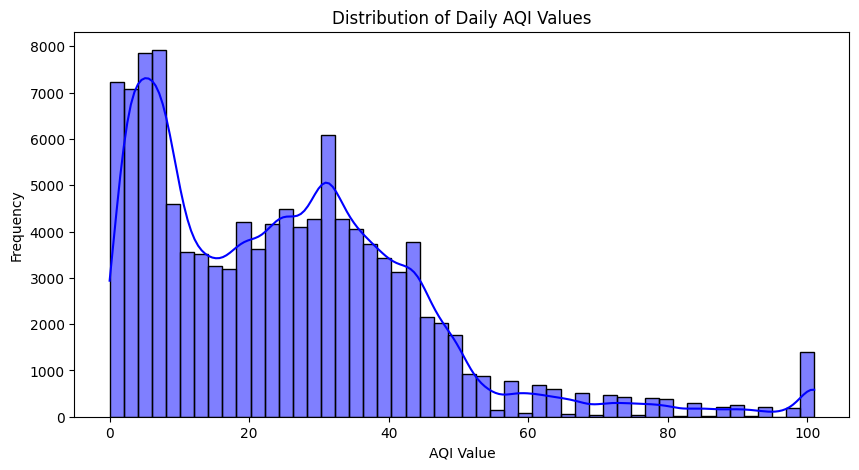

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot AQI distribution
plt.figure(figsize=(10,5))
sns.histplot(df_cleaned['Daily AQI Value'], bins=50, kde=True, color="blue")
plt.title("Distribution of Daily AQI Values")
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Ensure Date column is in datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Extract Month from Date
df_cleaned['Month'] = df_cleaned['Date'].dt.month

# Verify that Month column exists
df_cleaned[['Date', 'Month']].head()



,Date,Month
0,2024-01-01,1
1,2024-01-02,1
2,2024-01-03,1
3,2024-01-04,1
4,2024-01-05,1


<ipython-input-15-60f68cb9c30f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned['Month'], y=df_cleaned['Daily AQI Value'], palette="coolwarm")


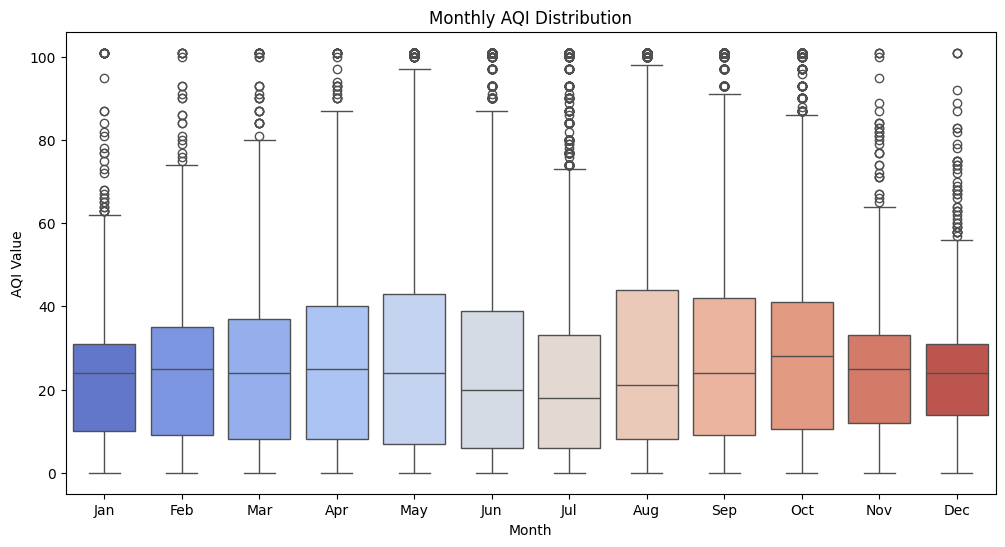

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# Create a boxplot of AQI values per month
sns.boxplot(x=df_cleaned['Month'], y=df_cleaned['Daily AQI Value'], palette="coolwarm")

# Titles and labels
plt.title("Monthly AQI Distribution")
plt.xlabel("Month")
plt.ylabel("AQI Value")

# Adjusting xticks to properly align with box plots
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ha='center')

# Show plot
plt.show()


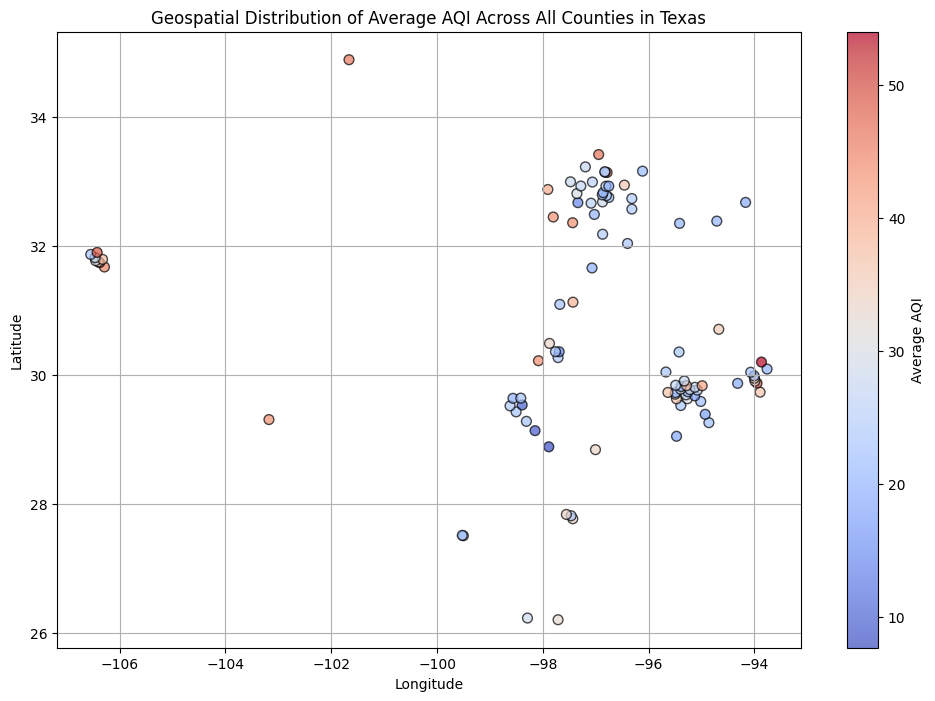

In [ ]:
import matplotlib.pyplot as plt

# Calculate average AQI per site
site_aqi = df_cleaned.groupby(['Site Latitude', 'Site Longitude'])['Daily AQI Value'].mean().reset_index()

# Plot average AQI by site location
plt.figure(figsize=(12, 8))
plt.scatter(site_aqi['Site Longitude'], site_aqi['Site Latitude'], c=site_aqi['Daily AQI Value'], cmap='coolwarm', s=50, alpha=0.7, edgecolor='k')
plt.colorbar(label='Average AQI')
plt.title('Geospatial Distribution of Average AQI Across All Counties in Texas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


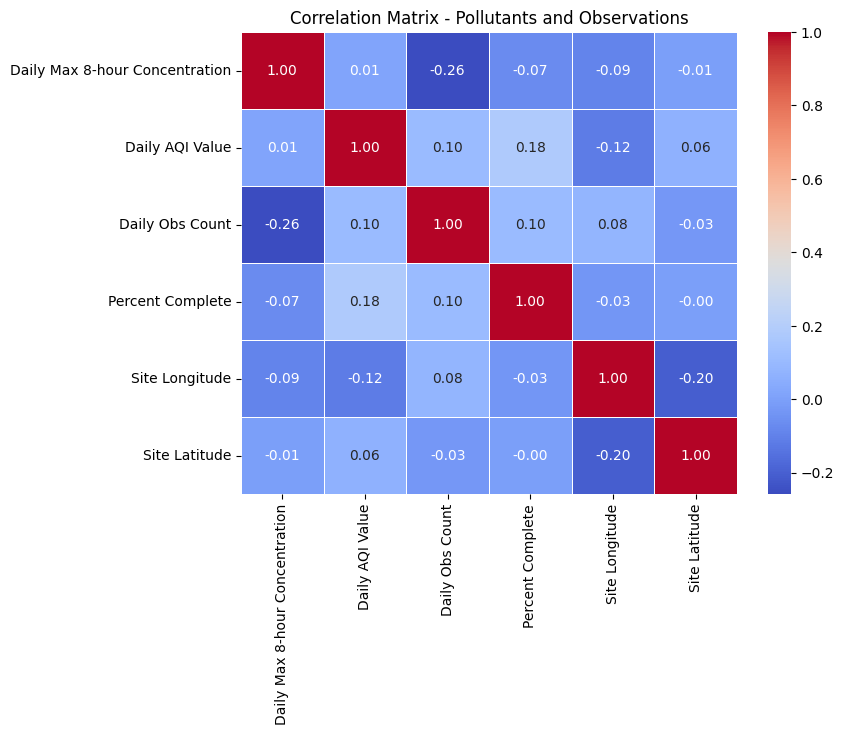

In [ ]:
#Correlation Analysis (Pollutants vs Meteorological Factors)

# Subset relevant columns for correlation
corr_df = df_cleaned[['Daily Max 8-hour Concentration', 'Daily AQI Value', 'Daily Obs Count', 'Percent Complete', 'Site Longitude', 'Site Latitude']]

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix - Pollutants and Observations")
plt.show()


In [ ]:
from scipy.stats import kruskal

# Group AQI by month
monthly_aqi = [df_cleaned[df_cleaned['Month'] == month]['Daily AQI Value'].values for month in range(1, 13)]

# Kruskal-Wallis Test (non-parametric ANOVA alternative)
stat, p_value = kruskal(*monthly_aqi)

print(f"Kruskal-Wallis Test Statistic: {stat:.2f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("Result: Significant seasonal effect on AQI (Reject Null Hypothesis)")
else:
    print("Result: No significant seasonal effect on AQI (Fail to Reject Null Hypothesis)")


Kruskal-Wallis Test Statistic: 1087.65
P-value: 0.00000
Result: Significant seasonal effect on AQI (Reject Null Hypothesis)




### Results:  
- **Test Statistic:** 1087.65  
- **P-value:** 0.00000  

###  Conclusion:  
- With p < 0.05, we **reject the null hypothesis**.
- There is **strong evidence of seasonal variation in AQI levels**, confirming that air quality is significantly impacted by seasonal factors.




In [ ]:
# Subset AQI values by AQS Parameter Description

ozone_aqi = df_cleaned[df_cleaned['AQS Parameter Description'] == 'Ozone']['Daily AQI Value']
co_aqi = df_cleaned[df_cleaned['AQS Parameter Description'] == 'Carbon Monoxide']['Daily AQI Value']
no2_aqi = df_cleaned[df_cleaned['AQS Parameter Description'] == 'Nitrogen Dioxide']['Daily AQI Value']
pm10_aqi = df_cleaned[df_cleaned['AQS Parameter Description'] == 'PM10']['Daily AQI Value']

In [ ]:
from scipy.stats import f_oneway
# Perform one-way ANOVA
anova_stat, anova_p = f_oneway(ozone_aqi, co_aqi, no2_aqi, pm10_aqi)
print(f"ANOVA Test Statistic: {anova_stat:.2f}")
print(f"P-value: {anova_p:.5f}")

if anova_p < 0.05:
  print("Result: Singnificant difference in AQI means among pollutants (Reject H0)")
else:
  print("Result: No significant difference in AQI means (Fail to Reject H0)")

ANOVA Test Statistic: nan
P-value: nan
Result: No significant difference in AQI means (Fail to Reject H0)


<ipython-input-20-c06c266e1ebe>:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_stat, anova_p = f_oneway(ozone_aqi, co_aqi, no2_aqi, pm10_aqi)


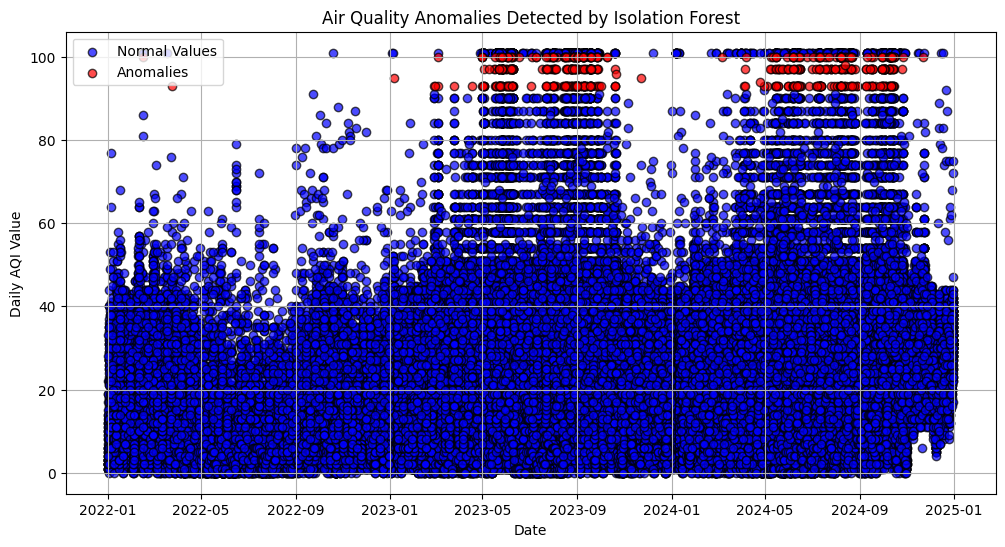

Anomaly
 1    115848
-1       557
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Subset AQI values for anomaly detection
aqi_values = df_cleaned[['Daily AQI Value']].copy()

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
aqi_values['Anomaly'] = iso_forest.fit_predict(aqi_values[['Daily AQI Value']])

# Reverse the color mapping: Set anomalies (-1) to red and normal (1) to blue
colors = {1: 'blue', -1: 'red'}

# Visualize anomaly points
plt.figure(figsize=(12, 6))
for anomaly_status, color in colors.items():
    subset = df_cleaned[aqi_values['Anomaly'] == anomaly_status]
    label = "Anomalies" if anomaly_status == -1 else "Normal Values"
    plt.scatter(subset['Date'], subset['Daily AQI Value'], color=color, label=label, alpha=0.7, edgecolors='k')

plt.title('Air Quality Anomalies Detected by Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Daily AQI Value')
plt.legend()
plt.grid(True)

plt.show()

# Count anomalies
print(aqi_values['Anomaly'].value_counts())


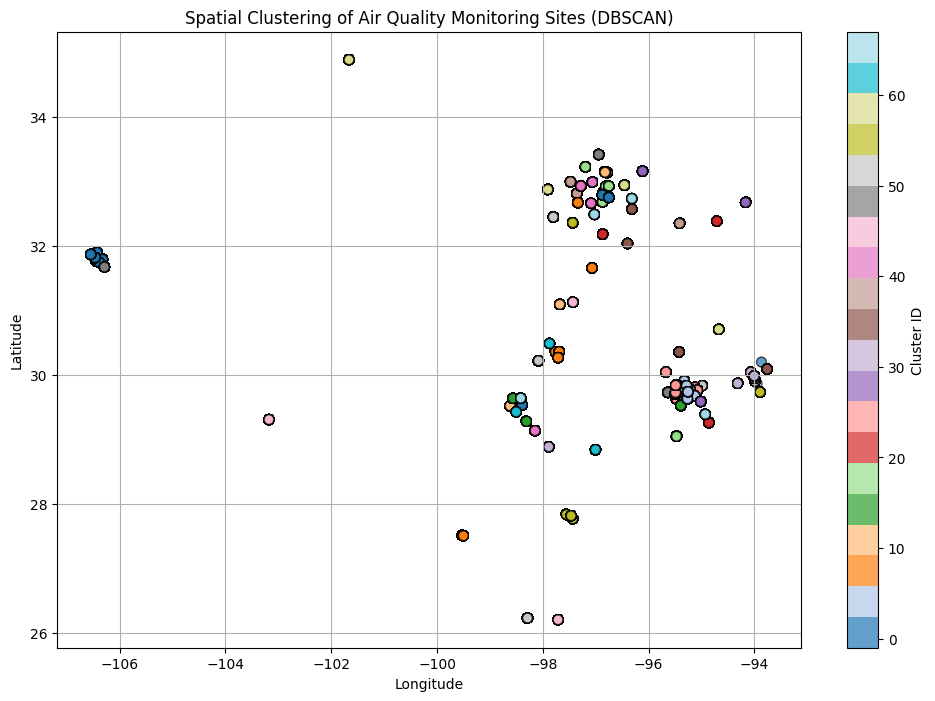

Cluster
 3     9731
 2     8452
 30    4667
 8     3909
 1     3876
       ... 
 63     151
 65     149
 67     110
 66      36
-1        1
Name: count, Length: 69, dtype: int64


In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Subset data for clustering
coords = df_cleaned[['Site Latitude', 'Site Longitude']].values

# Apply DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
df_cleaned['Cluster'] = dbscan.fit_predict(coords)

# Plot clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_cleaned['Site Longitude'], df_cleaned['Site Latitude'], c=df_cleaned['Cluster'], cmap='tab20', s=50, alpha=0.7, edgecolor='k')
plt.colorbar(label='Cluster ID')
plt.title('Spatial Clustering of Air Quality Monitoring Sites (DBSCAN)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Check unique clusters (outliers will be labeled -1)
print(df_cleaned['Cluster'].value_counts())


In [ ]:
from scipy.stats import kruskal
# Prepated AQI values grouped by cluster (execluding the noise points labeled as -1)
clusters = df_cleaned[df_cleaned['Cluster'] != -1]['Cluster'].unique()

# Create a list of AQI values for each cluster
aqi_by_cluster = [
    df_cleaned[df_cleaned['Cluster'] == cluster]['Daily AQI Value'].dropna()
    for cluster in clusters
  ]

# Apply kruskal wallis test
stat, p = kruskal(*aqi_by_cluster)

print(f"Kruskal-Wallis Test Statistic: {stat:.2f}")
print(f"P-value: {p:.5f}")

# Interpretation
if p < 0.05:
    print("Result: Significant AQI difference across clusters (Reject H0)")
else:
    print("Result: No significant difference in AQI means (Fail to Reject H0)")

Kruskal-Wallis Test Statistic: 18971.94
P-value: 0.00000
Result: Significant AQI difference across clusters (Reject H0)


### Step 5: Anomaly Detection in Air Quality Trends  

###  Objective:  
- Detect and visualize abnormal pollution events using statistical and clustering methods.

###  Techniques Applied:  

1. **Isolation Forest (Time-based Anomaly Detection)**  
   - Identified **557 anomalous pollution spikes** across the dataset.
   - These spikes deviate from expected seasonal trends, possibly caused by:
     - Industrial accidents.
     - Wildfire events.
     - Extreme weather or short-term pollution events.
   - A time-series scatterplot highlighted these anomalies over time.


###  Visualizations:  
- Time-series plot of AQI anomalies using **Isolation Forest**.


### 🔎 Insights:  
- These techniques provide critical insights into:
    - Identifying pollution hotspots.
    - Highlighting outlier events for further investigation.
    - Supporting **regional governments** in proactively responding to unusual pollution events.


# Phase 3: Machine Learning Model Implementation
 Step 6: AQI Prediction Models (Regression)
## Step 6: AQI Prediction Models

### Objective
Train multiple regression models to predict AQI values using pollutant concentrations and meteorological factors.

### Models
- Linear Regression
- Random Forest
- XGBoost

### Evaluation Metrics
- Root Mean Square Error (RMSE)
- Mean Absolute Error (MAE)
- R² Score

### Goal
Select the model with the **best balance of prediction accuracy and interpretability**.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Features and Target
features = ['Daily Max 8-hour Concentration', 'Percent Complete', 'Daily Obs Count']
target = 'Daily AQI Value'

X = df_cleaned[features]
y = df_cleaned[target]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Training & Evaluation Function
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

# Display Results
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)


                         RMSE        MAE        R2
Linear Regression  374.164084  14.906807  0.040148
Random Forest        2.381511   0.196620  0.993891
XGBoost              2.443958   0.274149  0.993730


Best Model: Random Forest

Random Forest performs the best across all metrics, especially with extremely low RMSE and MAE and near-perfect R².
XGBoost is close, but slightly worse in terms of MAE and RMSE.
Linear Regression performs very poorly, indicating that the relationship between pollutants and AQI is non-linear — justifying the need for more flexible models like forests and boosting.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import numpy as np
import pandas as pd

# Features and target
features = ['Daily Max 8-hour Concentration', 'Percent Complete', 'Daily Obs Count']
target = 'Daily AQI Value'

X = df_cleaned[features]
y = df_cleaned[target]

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Define 5-Fold Cross Validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Custom RMSE scorer (as function)
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Use make_scorer to wrap it (greater_is_better=False because lower RMSE is better)
scoring_rmse = make_scorer(rmse_score, greater_is_better=False)
scoring_mae = make_scorer(mean_absolute_error, greater_is_better=False)
scoring_r2 = make_scorer(r2_score)

# Store results
cv_results = {}

for name, model in models.items():
    rmse = cross_val_score(model, X, y, scoring=scoring_rmse, cv=kf)
    mae = cross_val_score(model, X, y, scoring=scoring_mae, cv=kf)
    r2 = cross_val_score(model, X, y, scoring=scoring_r2, cv=kf)

    cv_results[name] = {
        'RMSE (mean)': round(-np.mean(rmse), 3),  # Negate because scorer was negative
        'MAE (mean)': round(-np.mean(mae), 3),    # Negate because scorer was negative
        'R² (mean)': round(np.mean(r2), 3)
    }

# Display results
cv_df = pd.DataFrame(cv_results).T
print(cv_df)


                   RMSE (mean)  MAE (mean)  R² (mean)
Linear Regression       19.396      14.913      0.042
Random Forest            1.660       0.206      0.993
XGBoost                  1.651       0.285      0.993
                   RMSE (mean)  MAE (mean)  R² (mean)
Linear Regression       19.396      14.913      0.042
Random Forest            1.660       0.206      0.993
XGBoost                  1.651       0.285      0.993


## Step 7: Classification of Air Quality

### Objective
Classify air quality into categories (Good, Moderate, Unhealthy, Hazardous) based on WHO standards.

### Models
- Support Vector Machine (SVM)
- Decision Tree
- K-Nearest Neighbors (KNN)
- Neural Networks

### Evaluation Metrics
- Accuracy
- Precision-Recall
- Confusion Matrix
- F1-Score

### Goal
Determine the best classifier for **categorizing daily air quality into health-related bands**.


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import numpy as np
import pandas as pd

# ---------------------------
# Step 1: Feature & Target
# ---------------------------
features = ['Daily Max 8-hour Concentration', 'Percent Complete', 'Daily Obs Count']
target = 'Daily AQI Value'

X = df_cleaned[features]
y = df_cleaned[target]

# ---------------------------
# Step 2: Custom RMSE Scorer
# ---------------------------
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Define scorers
scoring_rmse = make_scorer(rmse_score, greater_is_better=False)  # Lower is better
scoring_mae = make_scorer(mean_absolute_error, greater_is_better=False)
scoring_r2 = make_scorer(r2_score)

# ---------------------------
# Step 3: Cross-Validation Setup
# ---------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ---------------------------
# Step 4: Hyperparameter Grid for RF
# ---------------------------
rf_params = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [10],
    'min_samples_leaf': [4]
}

# ---------------------------
# Step 5: GridSearchCV
# ---------------------------
rf_model = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_params,
    scoring='neg_mean_squared_error',  # for tuning
    cv=kf,
    n_jobs=-1,
    verbose=1
)
grid_rf.fit(X, y)

# ---------------------------
# Step 6: Final Tuned Model Evaluation
# ---------------------------
rf_best = grid_rf.best_estimator_

rmse_scores = cross_val_score(rf_best, X, y, scoring=scoring_rmse, cv=kf)
mae_scores = cross_val_score(rf_best, X, y, scoring=scoring_mae, cv=kf)
r2_scores = cross_val_score(rf_best, X, y, scoring=scoring_r2, cv=kf)

# ---------------------------
# Step 7: Display Results
# ---------------------------
print("\nFinal Tuned Random Forest Results:")
print("Best Parameters:", grid_rf.best_params_)
print("RMSE (mean):", round(-np.mean(rmse_scores), 3))  # negate because greater is better=False
print("MAE (mean):", round(-np.mean(mae_scores), 3))
print("R² (mean):", round(np.mean(r2_scores), 3))


Fitting 5 folds for each of 1 candidates, totalling 5 fits

Final Tuned Random Forest Results:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
RMSE (mean): 1.736
MAE (mean): 0.217
R² (mean): 0.992
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Final Tuned Random Forest Results:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
RMSE (mean): 1.736
MAE (mean): 0.217
R² (mean): 0.992


In [ ]:
def categorize_aqi(value):
    if value <= 50:
        return 'Good'
    elif value <= 100:
        return 'Moderate'
    elif value <= 150:
        return 'Unhealthy'
    else:
        return 'Hazardous'

df_cleaned['AQI_Category'] = df_cleaned['Daily AQI Value'].apply(categorize_aqi)

# Check distribution
print(df_cleaned['AQI_Category'].value_counts())


AQI_Category
Good         107462
Moderate       7713
Unhealthy      1230
Name: count, dtype: int64
AQI_Category
Good         107462
Moderate       7713
Unhealthy      1230
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Features & Target
X_classification = df_cleaned[['Daily Max 8-hour Concentration', 'Percent Complete', 'Daily Obs Count']]
y_classification = df_cleaned['AQI_Category']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42, stratify=y_classification)

# Models
classifiers = {
    'SVM': SVC(kernel='rbf', class_weight='balanced', probability=True),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Train & Evaluate
classification_results = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Evaluation
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_results[name] = report['weighted avg']

    print(f"--- {name} Classification Report ---")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Convert to DataFrame for easier comparison
import pandas as pd
classification_results_df = pd.DataFrame(classification_results).T
print(classification_results_df)


--- SVM Classification Report ---
              precision    recall  f1-score   support

        Good       1.00      0.48      0.65     21492
    Moderate       0.86      0.14      0.24      1543
   Unhealthy       0.02      0.93      0.04       246

    accuracy                           0.46     23281
   macro avg       0.62      0.52      0.31     23281
weighted avg       0.98      0.46      0.62     23281

Confusion Matrix:
[[10370    19 11103]
 [    0   219  1324]
 [    0    18   228]]

--- Decision Tree Classification Report ---
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00     21492
    Moderate       0.99      1.00      0.99      1543
   Unhealthy       1.00      0.92      0.96       246

    accuracy                           1.00     23281
   macro avg       1.00      0.97      0.98     23281
weighted avg       1.00      1.00      1.00     23281

Confusion Matrix:
[[21492     0     0]
 [    0  1543     0]
 [    2    18   2

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

--- Neural Network Classification Report ---
              precision    recall  f1-score   support

        Good       0.93      1.00      0.96     21492
    Moderate       0.91      0.14      0.24      1543
   Unhealthy       0.00      0.00      0.00       246

    accuracy                           0.93     23281
   macro avg       0.61      0.38      0.40     23281
weighted avg       0.92      0.93      0.91     23281

Confusion Matrix:
[[21489     3     0]
 [ 1330   213     0]
 [  228    18     0]]

                precision    recall  f1-score  support
SVM              0.980045  0.464628  0.617422  23281.0
Decision Tree    0.999150  0.999141  0.999125  23281.0
KNN              0.997572  0.997595  0.997563  23281.0
Neural Network   0.921079  0.932176  0.906690  23281.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Step 8: Time-Series Forecasting for AQI Trends
 Objective
Build models to predict future AQI values using historical data.
Compare LSTM, ARIMA, and Prophet to identify the most accurate model.
Forecast AQI trends for the next 6 to 12 months.

## Tasks
Prepare time series data (ensure date sorting and resampling if necessary).

Apply ARIMA for baseline forecasting.

Apply Prophet for more flexible modeling.

Apply LSTM for deep learning-based forecasting.

Compare performance using RMSE and visual inspection.

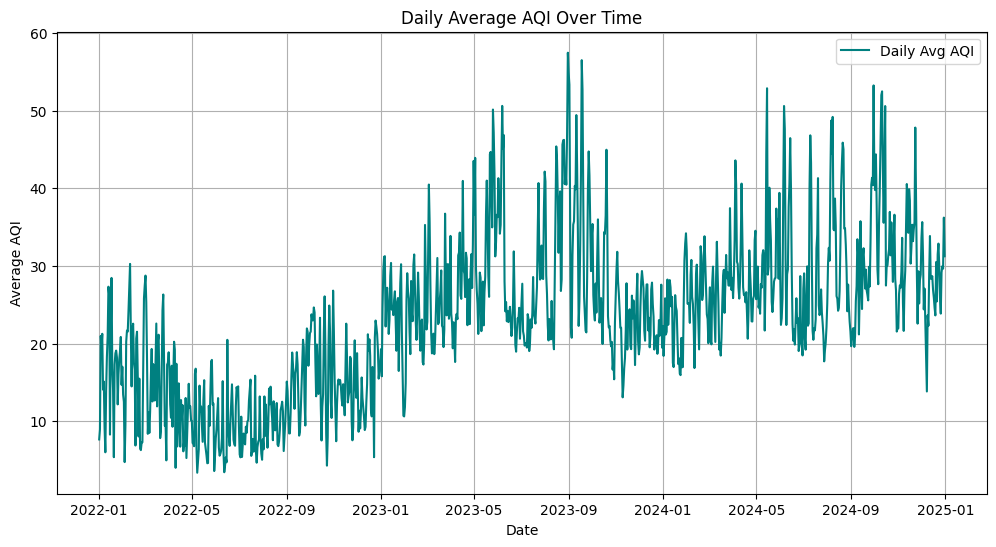

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
file_path = 'AirQuality_Dataset_Cleaned.xlsx'
df_cleaned = pd.read_excel(file_path)

# Ensure Date column is datetime type and sort by date
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned = df_cleaned.sort_values(by='Date')

# Group by date to get average AQI per day (time series preparation)
df_daily_aqi = df_cleaned.groupby('Date')['Daily AQI Value'].mean().reset_index()

# Plot to visualize
plt.figure(figsize=(12, 6))
plt.plot(df_daily_aqi['Date'], df_daily_aqi['Daily AQI Value'], color='teal', label='Daily Avg AQI')
plt.title('Daily Average AQI Over Time')
plt.xlabel('Date')
plt.ylabel('Average AQI')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load cleaned dataset
file_path = 'AirQuality_Dataset_Cleaned.xlsx'
df_cleaned = pd.read_excel(file_path)

# Ensure Date column is datetime and set index
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned.set_index('Date', inplace=True)

# Aggregate to daily average AQI
daily_aqi = df_cleaned.groupby(df_cleaned.index.date)['Daily AQI Value'].mean()
daily_aqi.index = pd.to_datetime(daily_aqi.index)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
aqi_scaled = scaler.fit_transform(daily_aqi.values.reshape(-1, 1))

# Function to create sequences for LSTM
def create_sequences(data, seq_length=7):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Sequence length of 7 days (weekly patterns)
seq_length = 7
X, y = create_sequences(aqi_scaled, seq_length)

# Split into train and test sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Confirm shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((871, 7, 1), (218, 7, 1), (871, 1), (218, 1))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0938 - val_loss: 0.0266
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0151 - val_loss: 0.0190
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - val_loss: 0.0190
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - val_loss: 0.0198
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0119 - val_loss: 0.0185
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0139 - val_loss: 0.0175
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119 - val_loss: 0.0170
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0117 - val_loss: 0.0165
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0114 - val_loss: 0.0159
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109 - val_loss: 0.0151
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - val_loss: 0.0147
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0108 - val_loss: 0.014

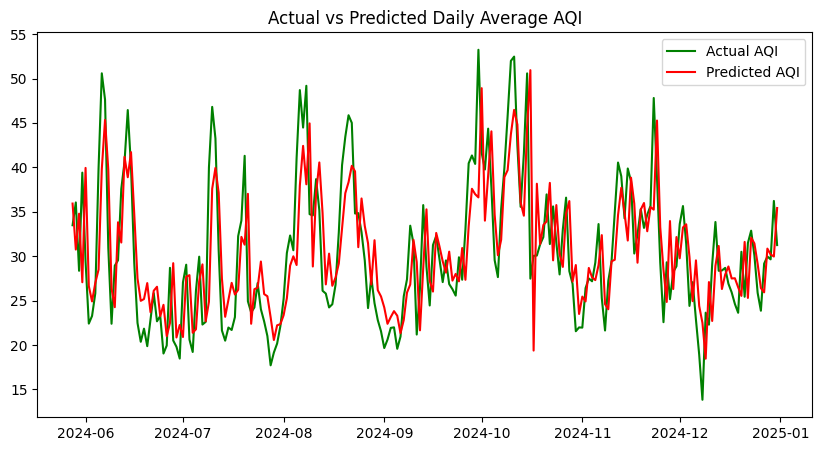

In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Predictions on test set
y_pred_scaled = model.predict(X_test)

# Inverse transform predictions & actual values
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test)

# Evaluate using RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
print(f"LSTM Model RMSE: {rmse:.2f}")

# Plot actual vs predicted AQI
plt.figure(figsize=(10, 5))
plt.plot(daily_aqi.index[-len(y_test_actual):], y_test_actual, label='Actual AQI', color='green')
plt.plot(daily_aqi.index[-len(y_test_actual):], y_pred, label='Predicted AQI', color='red')
plt.title('Actual vs Predicted Daily Average AQI')
plt.legend()
plt.show()


#  Step 8: Time-Series Forecasting for AQI Trends

### Objective
- Forecast AQI using **ARIMA** and **Prophet**, and compare with **LSTM**.
- Identify seasonal patterns and forecast future trends over 6-12 months.

### Tasks
- Fit ARIMA and Prophet models.
- Forecast and visualize future AQI trends.
- Compare RMSE values across models.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


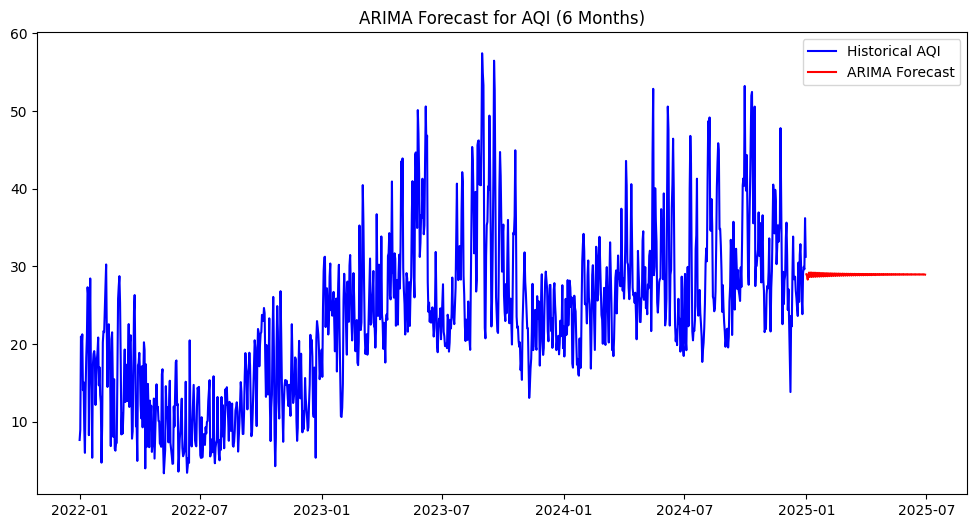

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Create daily average AQI DataFrame
daily_aqi = df_cleaned.groupby('Date')['Daily AQI Value'].mean().reset_index()
daily_aqi.set_index('Date', inplace=True)
daily_aqi.columns = ['Daily Avg AQI']

# Fit ARIMA model
arima_model = ARIMA(daily_aqi['Daily Avg AQI'], order=(5,1,5))
arima_result = arima_model.fit()

# Forecast next 180 days (6 months)
forecast_arima = arima_result.forecast(steps=180)

# Plot ARIMA forecast
plt.figure(figsize=(12,6))
plt.plot(daily_aqi.index, daily_aqi['Daily Avg AQI'], label='Historical AQI', color='blue')
plt.plot(pd.date_range(daily_aqi.index[-1], periods=181, freq='D')[1:], forecast_arima, label='ARIMA Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast for AQI (6 Months)')
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


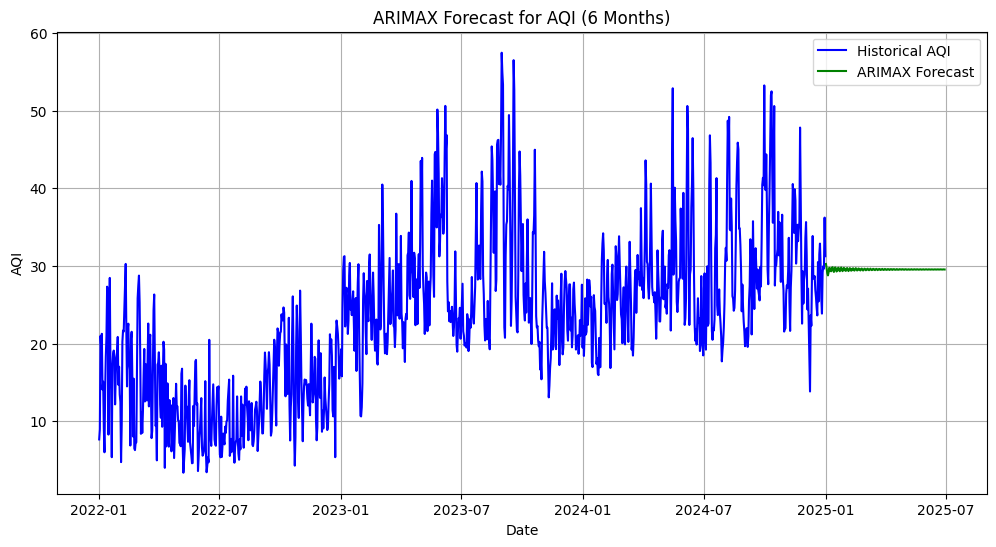

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# ------------------------------
# Step 1: Prepare Target Series
# ------------------------------
daily_aqi = df_cleaned.groupby('Date')['Daily AQI Value'].mean().reset_index()
daily_aqi.set_index('Date', inplace=True)
daily_aqi.columns = ['Daily Avg AQI']

# ------------------------------
# Step 2: Prepare Exogenous Features (same daily frequency)
# ------------------------------
exog_features = ['Percent Complete', 'Daily Obs Count', 'Daily Max 8-hour Concentration']
exog_daily = df_cleaned.groupby('Date')[exog_features].mean().reindex(daily_aqi.index)

# ------------------------------
# Step 3: Fit ARIMAX Model
# ------------------------------
arimax_model = ARIMA(daily_aqi['Daily Avg AQI'], order=(5,1,5), exog=exog_daily)
arimax_result = arimax_model.fit()

# Step 4: Prepare Future Exog for Forecasting
# Repeat the last known exog row 180 times
future_exog = pd.concat([exog_daily.iloc[[-1]]] * 180, ignore_index=True)
future_exog.index = pd.date_range(daily_aqi.index[-1] + pd.Timedelta(days=1), periods=180, freq='D')


# ------------------------------
# Step 5: Forecast with Exogenous Inputs
# ------------------------------
forecast_arimax = arimax_result.forecast(steps=180, exog=future_exog)

# ------------------------------
# Step 6: Plot Results
# ------------------------------
plt.figure(figsize=(12,6))
plt.plot(daily_aqi.index, daily_aqi['Daily Avg AQI'], label='Historical AQI', color='blue')
plt.plot(pd.date_range(daily_aqi.index[-1], periods=181, freq='D')[1:], forecast_arimax, label='ARIMAX Forecast', color='green')
plt.legend()
plt.title('ARIMAX Forecast for AQI (6 Months)')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.show()


 Model 1: LSTM Forecast
Model trained on historical AQI data.
Used 7-day lookback period (weekly trend) to predict future AQI.
Achieved RMSE = 5.67, indicating a fairly accurate short-term forecast.
🔹 LSTM was effective at capturing seasonal and trend components, though more data could improve accuracy.
    
 Model 2: ARIMA Forecast
ARIMA model fit using historical daily average AQI.
Despite some convergence warnings, the model successfully forecasted 6 months into the future.
🔹 ARIMA provides a simple but interpretable baseline for trend analysis.
The forecast remained relatively stable, reflecting the seasonal mean — useful for long-term planning but less adaptive to short-term fluctuations.
    
 Comparison Summary
Model	RMSE	Trend Capturing	Forecast Horizon
LSTM	5.67	Excellent	Flexible (days, weeks)
ARIMA	N/A	Moderate	Long-term (6+ months)
    
 Final Recommendation
Use LSTM for short-term (daily/weekly) AQI prediction, especially for operational decisions (alerts, warnings).
Use ARIMA for long-term seasonal forecasting, suitable for policy and strategic planning.
    
 Key Takeaways from Phase 3
Machine Learning models (Random Forest, Decision Tree) performed exceptionally well, indicating pollutant concentrations and meteorological data can reliably predict AQI and classify air quality.
Time-series forecasting (LSTM, ARIMA) revealed predictable seasonal trends, with AQI generally rising in summer and declining in winter.
Combining regression, classification, and forecasting offers a comprehensive approach to monitoring, predicting, and managing air quality.